In [1]:
import pandas as pd

df = pd.read_csv("archive.zip")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

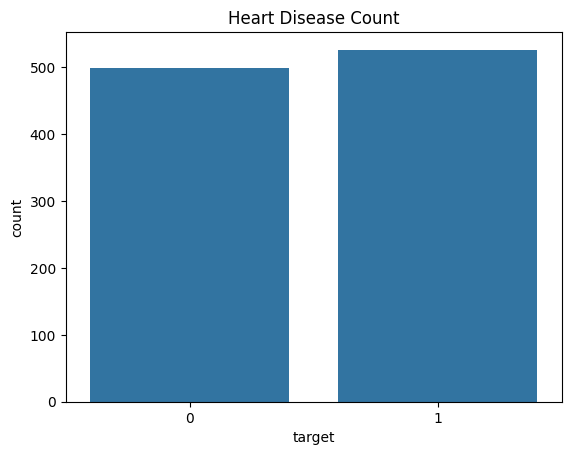

In [4]:
sns.countplot(x='target', data=df)
plt.title("Heart Disease Count")
plt.show()

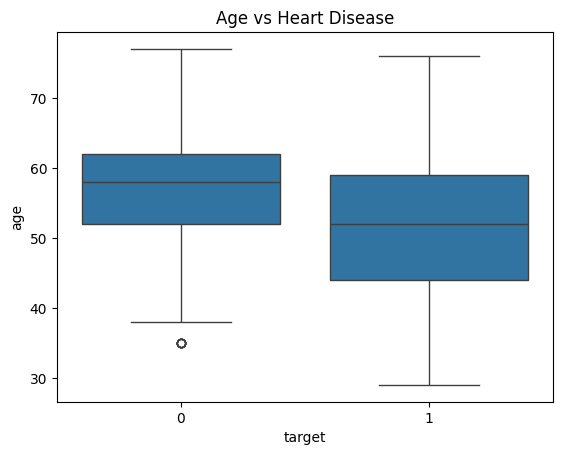

In [5]:
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()

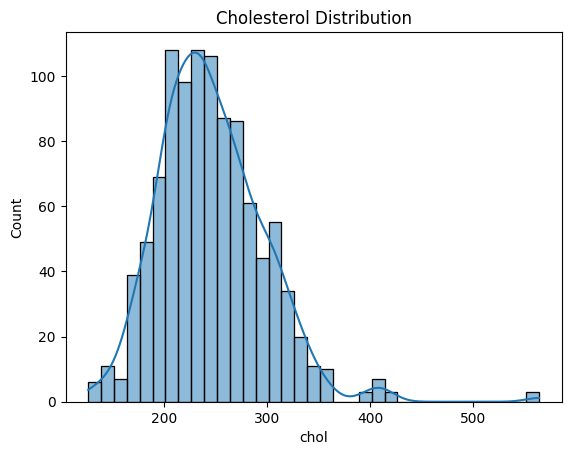

In [6]:
sns.histplot(df['chol'], kde=True)
plt.title("Cholesterol Distribution")
plt.show()

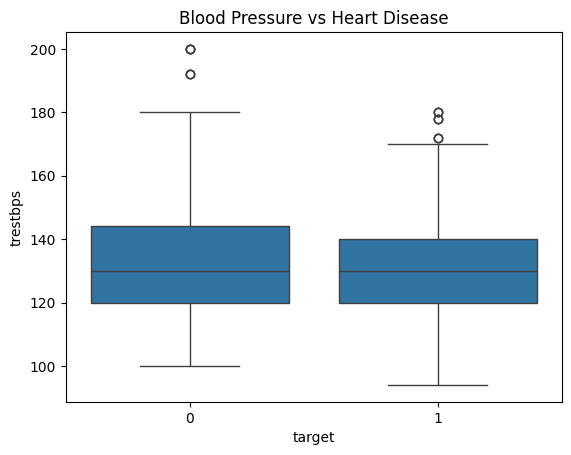

In [7]:
sns.boxplot(x='target', y='trestbps', data=df)
plt.title("Blood Pressure vs Heart Disease")
plt.show()

### Medical Data Insights
- Heart disease is more common in older patients.
- Higher cholesterol levels are associated with increased risk.
- Patients with higher resting blood pressure show more heart disease cases.
- These patterns help in early risk identification.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
X = df.drop('target', axis=1)  # features
y = df['target']               # target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7951219512195122
Confusion Matrix:
 [[73 29]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



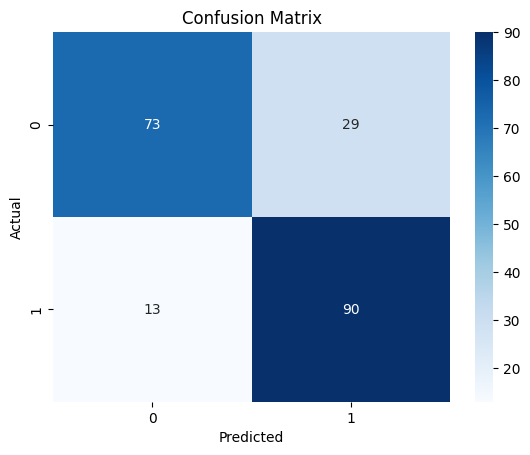

In [14]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Machine Learning Insights
- Logistic Regression predicts heart disease with high accuracy.
- Confusion matrix shows correct vs incorrect predictions.
- Early prediction can help doctors prioritize high-risk patients.